<a href="https://colab.research.google.com/github/Anujaghotekar/Seoul-bike-sharing-demand-prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Seoul Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team (Data Pirates)
##### *Team Member 1 -Tabassum Patel (Team Leader)*
##### *Team Member 2 -Shubham Kodape*
##### *Team Member 3 -Asma Patel*
##### *Team Member 4 -anuja Ghotekar*
##### *Team Member 5 -Pratiksha Auti*

# **Project Summary -**


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **GitHub Link -**

Provide your GitHub Link here.

1.   https://github.com/Anujaghotekar


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
#load the seol bike data set from drive
bike_sharing_df=pd.read_csv('/content/SeoulBikeData (1).csv',encoding ='latin')

df1 =bike_sharing_df.copy()

In [ ]:
# head will display top 5 rows (by  default)
bike_sharing_df.head().T    # T is for rows to columns and columns to rows

,0,1,2,3,4
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [ ]:
bike_sharing_df.tail().T

,8755,8756,8757,8758,8759
Date,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018
Rented Bike Count,1003,764,694,712,584
Hour,19,20,21,22,23
Temperature(°C),4.2,3.4,2.6,2.1,1.9
Humidity(%),34,37,39,41,43
Wind speed (m/s),2.6,2.3,0.3,1.0,1.3
Visibility (10m),1894,2000,1968,1859,1909
Dew point temperature(°C),-10.3,-9.9,-9.9,-9.8,-9.3
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_sharing_df.shape

(8760, 14)

This dataset contains 8760 rows and 14 columns.


### Dataset Information

In [ ]:
# Dataset Info
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#print the unique value
bike_sharing_df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_sharing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
(bike_sharing_df[bike_sharing_df.duplicated()]).shape

(0, 14)

In [ ]:
# Dropping duplicate values
bike_sharing_df.drop_duplicates(inplace = True)

In [ ]:
bike_sharing_df.shape

(8760, 14)

The number of duplicate value in dataset is 0.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_sharing_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Dataset doesn't have any null value.

In [ ]:
# Visualizing the missing values
print("In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.")

In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.


### What did you know about your dataset?

Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: *Season of the year, type : str, there are only 4 season's in data *.

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

1.first we understand the nature of dataset then take a variable called bike_df and apply a .columns property which returns the label of each column in the DataFrame were it fecthing all the csv data called hotel bookings and give output in the form of columns.

2.in other dataset we are using same variable known as bike_df and using .describe() method which returns description of the data in the DataFrame and it fecting all the csv data which is hotel bookings so that it give output in descriptive way.

## Feature Engineering & Data Pre-processing :-

#1.Handling missing values

## Handling Missing Values & Missing Value Imputation

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

In [ ]:
# Missing Values/Null Values Count
df1.drop_duplicates(inplace = True)
df1.isna().sum()
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

**Why is it important to remove duplicate records from my data?** 

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.


In [ ]:
#Checking Duplicate Values
value=len(df1[df1.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

### 2. Handling Outliers

# Handling Outliers & Outlier treatments

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [ ]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bike_sharing_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Rainfall(mm)',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Snowfall (cm)',
 'Dew point temperature(°C)',
 'Humidity(%)']

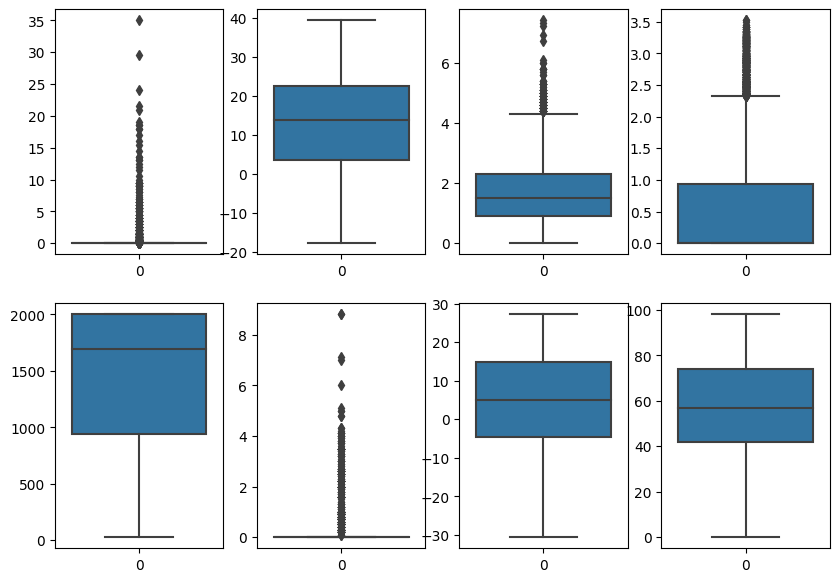

In [ ]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(bike_sharing_df[item])

**Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation**

In [ ]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [ ]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bike_sharing_df[outlier_cols].quantile(0.25)
Q3 = bike_sharing_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR



Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [ ]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [ ]:
#Detecting and removing the outliers
bike_sharing_df[outlier_cols] = bike_sharing_df[outlier_cols][~((bike_sharing_df[outlier_cols] < l_fence) | (bike_sharing_df[outlier_cols] > u_fence))]

In [ ]:
#Checking the number of outliers deleted
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.**

In [ ]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bike_sharing_df[col].fillna(bike_sharing_df[col].median(),inplace=True)
    

In [ ]:
#Calling the imputing function
impute_null(outlier_cols)

In [ ]:
#Checking if the imputation is successful
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**The imputation is successful and therefore we have handled the outliers successfully**

##**Feature Engineering :-**


###Feature encoding:
####Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as Feature Encoding

Here we have three columns that require encoding and they are Seasons, Holiday and Functioning Day.

In [ ]:
#Encoding for Seasons column
bike_sharing_df['Winter'] = np.where(bike_sharing_df['Seasons']=='Winter', 1, 0)
bike_sharing_df['Spring'] = np.where(bike_sharing_df['Seasons']=='Spring', 1, 0)
bike_sharing_df['Summer'] = np.where(bike_sharing_df['Seasons']=='Summer', 1, 0)
bike_sharing_df['Autumn'] = np.where(bike_sharing_df['Seasons']=='Autumn', 1, 0)

#Removing seasons column since we dont require it now.
bike_sharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [ ]:
#Encoding for Holiday column
bike_sharing_df['Holiday'] = np.where(bike_sharing_df['Holiday']=='Holiday',1,0)

In [ ]:
#Encoding for Functioning day
bike_sharing_df['Functioning Day'] = np.where(bike_sharing_df['Functioning Day']=='Yes',1,0)

In [ ]:
#Look of the dataframe after encoding all three columns
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
